In [1]:
import psi4

In [3]:
%%time
#! Example potential energy surface scan and CP-correction for Ar2

ar2_geometry = """
Ar
--
Ar 1 {0}
"""

Rvals = [3.5, 4.0, 5.0, 6.0]

psi4.set_options({'freeze_core': True})

# Initialize a blank dictionary of counterpoise corrected energies
# (Need this for the syntax below to work)

ecp = {}

for R in Rvals:
    ar2 = psi4.geometry(ar2_geometry.format(R))
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)

# Prints to screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    print("            {:3.1f}                        {:1.6f}".format(R, e))

# Prints to output.dat
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))


Scratch directory: /tmp/

  //>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>//
  // ManyBody Setup: N-Body Levels [1, 2]//
  //<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<//

        Number of 1-body computations:     2
        Number of 2-body computations:     1

    -----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.7a1.dev44 

                         Git: Rev {master} 2792bff 


    D. G. A. Smith, L. A. Burns, A. C. Simmonett, R. M. Parrish,
    M. C. Schieber, R. Galvelis, P. Kraus, H. Kruse, R. Di Remigio,
    A. Alenaizan, A. M. James, S. Lehtola, J. P. Misiewicz, M. Scheurer,
    R. A. Shaw, J. B. Schriber, Y. Xie, Z. L. Glick, D. A. Sirianni,
    J. S. O'Brien, J. M. Waldrop, A. Kumar, E. G. Hohenstein,
    B. P. Pritchard, B. R. Brooks, H. F. Schaefer III, A. Yu. Sokolov,
    K. Patkowski, A. E. DePrince III, U. Bozkaya, R. A. King,
    F. A. Evangelista, J. M. 

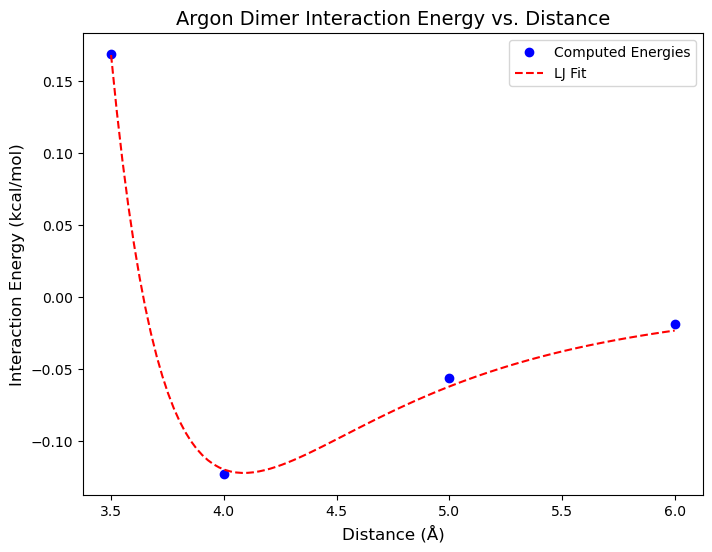

In [29]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Distances (R) and corresponding interaction energies (E) in kcal/mol
Rvals = np.array([3.5, 4.0, 5.0, 6.0])
Energies = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])
# Define the Lennard-Jones potential function
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)
# Fit the interaction energy data to the Lennard-Jones potential
params, covariance = curve_fit(lj, Rvals, Energies, p0=[3.8, -0.1])  # Initial guesses for sigma and eps
sigma_fit, eps_fit = params
# Generate fitted energy values over a range of distances for smooth plotting
R_fit = np.linspace(3.5, 6.0, 100)
E_fit = lj(R_fit, sigma_fit, eps_fit)
# Plot the computed energies and the fitted Lennard-Jones curve
plt.figure(figsize=(8, 6))
plt.plot(Rvals, Energies, 'o', label='Computed Energies', color='blue')  # Computed energies as dots
plt.plot(R_fit, E_fit, '--', label='LJ Fit', color='red')  # LJ fit as dashed line
# Add labels and legend
plt.xlabel('Distance (Å)', fontsize=12)
plt.ylabel('Interaction Energy (kcal/mol)', fontsize=12)
plt.title('Argon Dimer Interaction Energy vs. Distance', fontsize=14)
plt.legend()
plt.grid(False)
plt.savefig('./ar_lj')
# Display the plot
plt.show()






